In [3]:
# 1. install kaggle package
!pip install kaggle

# 2. move kaggle.json (upload via Colab UI or mount from Drive)
!mkdir -p ~/.kaggle
!cp /content/kaggle.json ~/.kaggle/   # ✅ هنا أضفنا المسار الجديد
!chmod 600 ~/.kaggle/kaggle.json

# 3. Download dataset (use the dataset slug)
!kaggle datasets download -d rishidamarla/heart-disease-prediction
# 4. Unzip the downloaded file into a dataset folder
!unzip /content/heart-disease-prediction.zip -d /content/dataset


Dataset URL: https://www.kaggle.com/datasets/rishidamarla/heart-disease-prediction
License(s): CC0-1.0
  0% 0.00/3.41k [00:00<?, ?B/s]
100% 3.41k/3.41k [00:00<00:00, 14.1MB/s]
Archive:  /content/heart-disease-prediction.zip
  inflating: /content/dataset/Heart_Disease_Prediction.csv  


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, regularizers
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import json


In [6]:
# Load dataset
data = pd.read_csv("/content/dataset/Heart_Disease_Prediction.csv")

# Encode target
data['Heart Disease'] = data['Heart Disease'].apply(lambda x: 1 if x=='Presence' else 0)

# Split features & target
X = data.drop('Heart Disease', axis=1)
y = data['Heart Disease']

# Train-Test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Standardize numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [7]:
# Model 1: Small network
model_1 = keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# Model 2: Medium network + BatchNorm
model_2 = keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(32, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# Model 3: Large network + L2 regularization
model_3 = keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)),
    layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    layers.Dropout(0.5),
    layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

models = {'Model_1': model_1, 'Model_2': model_2, 'Model_3': model_3}


In [8]:
histories = {}

for name, model in models.items():
    print(f"\nTraining {name}...")

    model.compile(
        optimizer='adam',          # can try SGD, RMSProp
        loss='binary_crossentropy',
        metrics=['accuracy']
    )

    history = model.fit(
        X_train, y_train,
        validation_split=0.2,
        epochs=50,
        batch_size=32,
        callbacks=[
            keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True),
            keras.callbacks.ModelCheckpoint(f'{name}.h5', save_best_only=True)
        ],
        verbose=1
    )

    histories[name] = history



Training Model_1...
Epoch 1/50
1/6 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.4688 - loss: 1.0180

6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - accuracy: 0.4379 - loss: 0.9731 - val_accuracy: 0.5909 - val_loss: 0.7504
Epoch 2/50
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.5000 - loss: 0.8519

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.4583 - loss: 0.8615 - val_accuracy: 0.6136 - val_loss: 0.7052
Epoch 3/50
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.4375 - loss: 0.9281

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.4915 - loss: 0.8071 - val_accuracy: 0.6364 - val_loss: 0.6695
Epoch 4/50
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.5312 - loss: 0.7400

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.5325 - loss: 0.7300 - val_accuracy: 0.6591 - val_loss: 0.6400
Epoch 5/50
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.6250 - loss: 0.6774

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6169 - loss: 0.6690 - val_accuracy: 0.6818 - val_loss: 0.6142
Epoch 6/50
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.5000 - loss: 0.7201

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.5602 - loss: 0.6714 - val_accuracy: 0.7273 - val_loss: 0.5933
Epoch 7/50
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.6875 - loss: 0.5990

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6338 - loss: 0.6158 - val_accuracy: 0.7045 - val_loss: 0.5748
Epoch 8/50
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.6875 - loss: 0.5498

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7057 - loss: 0.5635 - val_accuracy: 0.7273 - val_loss: 0.5578
Epoch 9/50
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.6562 - loss: 0.6553

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7178 - loss: 0.5796 - val_accuracy: 0.7727 - val_loss: 0.5415
Epoch 10/50
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.6875 - loss: 0.5307

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7597 - loss: 0.5252 - val_accuracy: 0.7955 - val_loss: 0.5264
Epoch 11/50
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7812 - loss: 0.5438

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7880 - loss: 0.5178 - val_accuracy: 0.7955 - val_loss: 0.5129
Epoch 12/50
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.7812 - loss: 0.5110

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7697 - loss: 0.4858 - val_accuracy: 0.7727 - val_loss: 0.5001
Epoch 13/50
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.9375 - loss: 0.3968

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8654 - loss: 0.4432 - val_accuracy: 0.7727 - val_loss: 0.4885
Epoch 14/50
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.8438 - loss: 0.4360

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8433 - loss: 0.4295 - val_accuracy: 0.7727 - val_loss: 0.4769
Epoch 15/50
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9375 - loss: 0.3651

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8480 - loss: 0.4351 - val_accuracy: 0.7955 - val_loss: 0.4667
Epoch 16/50
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.7812 - loss: 0.4217

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8318 - loss: 0.4165 - val_accuracy: 0.7955 - val_loss: 0.4585
Epoch 17/50
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9062 - loss: 0.3758

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8544 - loss: 0.4018 - val_accuracy: 0.7955 - val_loss: 0.4523
Epoch 18/50
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9688 - loss: 0.2758

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9011 - loss: 0.3577 - val_accuracy: 0.7955 - val_loss: 0.4466
Epoch 19/50
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.7188 - loss: 0.5124

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7983 - loss: 0.4221 - val_accuracy: 0.7955 - val_loss: 0.4424
Epoch 20/50
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.8438 - loss: 0.3438

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8386 - loss: 0.3656 - val_accuracy: 0.7955 - val_loss: 0.4392
Epoch 21/50
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.8125 - loss: 0.4403

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8291 - loss: 0.3929 - val_accuracy: 0.7955 - val_loss: 0.4371
Epoch 22/50
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.8125 - loss: 0.3746

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.8311 - loss: 0.3676 - val_accuracy: 0.8182 - val_loss: 0.4352
Epoch 23/50
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.8125 - loss: 0.3530

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8179 - loss: 0.3695 - val_accuracy: 0.8182 - val_loss: 0.4338
Epoch 24/50
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.9062 - loss: 0.2616

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.8643 - loss: 0.3162 - val_accuracy: 0.8182 - val_loss: 0.4324
Epoch 25/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8575 - loss: 0.3511 - val_accuracy: 0.7955 - val_loss: 0.4335
Epoch 26/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8801 - loss: 0.2962 - val_accuracy: 0.8182 - val_loss: 0.4349
Epoch 27/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8585 - loss: 0.3271 - val_accuracy: 0.8182 - val_loss: 0.4374
Epoch 28/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8268 - loss: 0.3250 - val_accuracy: 0.8182 - val_loss: 0.4398
Epoch 29/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8436 - loss: 0.3437 - val_accuracy: 0.8182 - val_loss: 0.4437

Training Model_2...
Epoch 1/50
1/6 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step - accuracy: 0.5000 - loss: 0.7512

6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - accuracy: 0.4821 - loss: 0.8114 - val_accuracy: 0.6818 - val_loss: 0.6621
Epoch 2/50
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.4688 - loss: 0.6821

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.5154 - loss: 0.7186 - val_accuracy: 0.7045 - val_loss: 0.6449
Epoch 3/50
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.5625 - loss: 0.6983

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.6420 - loss: 0.6528 - val_accuracy: 0.7727 - val_loss: 0.6299
Epoch 4/50
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.7188 - loss: 0.6053

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.7112 - loss: 0.5788 - val_accuracy: 0.7273 - val_loss: 0.6159
Epoch 5/50
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.8125 - loss: 0.5305

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.7849 - loss: 0.5336 - val_accuracy: 0.7500 - val_loss: 0.6023
Epoch 6/50
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.6250 - loss: 0.5614

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.7474 - loss: 0.5112 - val_accuracy: 0.7500 - val_loss: 0.5864
Epoch 7/50
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.7188 - loss: 0.5390

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.7854 - loss: 0.4945 - val_accuracy: 0.7500 - val_loss: 0.5719
Epoch 8/50
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.7812 - loss: 0.4992

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.8460 - loss: 0.4416 - val_accuracy: 0.7273 - val_loss: 0.5561
Epoch 9/50
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.9688 - loss: 0.3529

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.8698 - loss: 0.3926 - val_accuracy: 0.7273 - val_loss: 0.5399
Epoch 10/50
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9375 - loss: 0.4194

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.8628 - loss: 0.4214 - val_accuracy: 0.7273 - val_loss: 0.5225
Epoch 11/50
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.8125 - loss: 0.4146

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.8534 - loss: 0.3896 - val_accuracy: 0.7500 - val_loss: 0.5063
Epoch 12/50
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.9062 - loss: 0.3298

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.8942 - loss: 0.3293 - val_accuracy: 0.7500 - val_loss: 0.4920
Epoch 13/50
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step - accuracy: 0.8750 - loss: 0.3756

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.8458 - loss: 0.3870 - val_accuracy: 0.7500 - val_loss: 0.4803
Epoch 14/50
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step - accuracy: 0.7500 - loss: 0.4260

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.8330 - loss: 0.3608 - val_accuracy: 0.7500 - val_loss: 0.4681
Epoch 15/50
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step - accuracy: 0.9062 - loss: 0.3071

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.8686 - loss: 0.3365 - val_accuracy: 0.7727 - val_loss: 0.4585
Epoch 16/50
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.9375 - loss: 0.2961

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.9038 - loss: 0.3179 - val_accuracy: 0.7727 - val_loss: 0.4509
Epoch 17/50
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.8438 - loss: 0.3239

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.8940 - loss: 0.2859 - val_accuracy: 0.7727 - val_loss: 0.4442
Epoch 18/50
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.7812 - loss: 0.4656

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.8275 - loss: 0.3472 - val_accuracy: 0.7727 - val_loss: 0.4380
Epoch 19/50
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9062 - loss: 0.2737

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.9002 - loss: 0.2636 - val_accuracy: 0.7727 - val_loss: 0.4335
Epoch 20/50
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.9688 - loss: 0.1933

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.9140 - loss: 0.2560 - val_accuracy: 0.7727 - val_loss: 0.4325
Epoch 21/50
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9062 - loss: 0.3072

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.9087 - loss: 0.2868 - val_accuracy: 0.8182 - val_loss: 0.4311
Epoch 22/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8614 - loss: 0.3192 - val_accuracy: 0.7955 - val_loss: 0.4328
Epoch 23/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9313 - loss: 0.2317 - val_accuracy: 0.7955 - val_loss: 0.4345
Epoch 24/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8792 - loss: 0.2251 - val_accuracy: 0.7955 - val_loss: 0.4377
Epoch 25/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9270 - loss: 0.2207 - val_accuracy: 0.7955 - val_loss: 0.4433
Epoch 26/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9273 - loss: 0.2148 - val_accuracy: 0.7955 - val_loss: 0.4488

Training Model_3...
Epoch 1/50
1/6 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 0.4062 - loss: 1.8172

6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - accuracy: 0.4671 - loss: 1.7869 - val_accuracy: 0.7500 - val_loss: 1.6972
Epoch 2/50
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.8125 - loss: 1.6729

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.7346 - loss: 1.6615 - val_accuracy: 0.7955 - val_loss: 1.6109
Epoch 3/50
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.7188 - loss: 1.5763

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.7483 - loss: 1.5639 - val_accuracy: 0.7955 - val_loss: 1.5262
Epoch 4/50
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.7188 - loss: 1.5427

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.8096 - loss: 1.4922 - val_accuracy: 0.8182 - val_loss: 1.4395
Epoch 5/50
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.7812 - loss: 1.4457

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.7966 - loss: 1.4061 - val_accuracy: 0.8182 - val_loss: 1.3549
Epoch 6/50
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.7500 - loss: 1.2948

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.8182 - loss: 1.2943 - val_accuracy: 0.8182 - val_loss: 1.2783
Epoch 7/50
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.8438 - loss: 1.2210

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.8495 - loss: 1.2052 - val_accuracy: 0.8182 - val_loss: 1.2156
Epoch 8/50
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.8125 - loss: 1.1984

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.8415 - loss: 1.1586 - val_accuracy: 0.7955 - val_loss: 1.1681
Epoch 9/50
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9688 - loss: 1.0144

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.8764 - loss: 1.0611 - val_accuracy: 0.7955 - val_loss: 1.1254
Epoch 10/50
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.8438 - loss: 1.0123

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.8391 - loss: 1.0247 - val_accuracy: 0.7955 - val_loss: 1.0881
Epoch 11/50
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9062 - loss: 0.9360

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.8816 - loss: 0.9531 - val_accuracy: 0.8182 - val_loss: 1.0591
Epoch 12/50
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.8438 - loss: 0.9270

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.8848 - loss: 0.9169 - val_accuracy: 0.8182 - val_loss: 1.0323
Epoch 13/50
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.8750 - loss: 0.9165

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.8855 - loss: 0.8891 - val_accuracy: 0.8182 - val_loss: 1.0046
Epoch 14/50
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.8750 - loss: 0.8777

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.8801 - loss: 0.8579 - val_accuracy: 0.8182 - val_loss: 0.9795
Epoch 15/50
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.8125 - loss: 0.8831

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.8684 - loss: 0.8215 - val_accuracy: 0.8182 - val_loss: 0.9590
Epoch 16/50
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.8438 - loss: 0.8447

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.8835 - loss: 0.7862 - val_accuracy: 0.8182 - val_loss: 0.9432
Epoch 17/50
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.9375 - loss: 0.6552

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9163 - loss: 0.7200 - val_accuracy: 0.7727 - val_loss: 0.9288
Epoch 18/50
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9688 - loss: 0.6461

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9001 - loss: 0.7266 - val_accuracy: 0.7955 - val_loss: 0.9019
Epoch 19/50
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.8750 - loss: 0.8357

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.8914 - loss: 0.7324 - val_accuracy: 0.8182 - val_loss: 0.8807
Epoch 20/50
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.8438 - loss: 0.7282

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.8483 - loss: 0.7171 - val_accuracy: 0.8182 - val_loss: 0.8664
Epoch 21/50
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9375 - loss: 0.6028

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.9032 - loss: 0.6473 - val_accuracy: 0.8182 - val_loss: 0.8540
Epoch 22/50
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.9062 - loss: 0.7335

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.9038 - loss: 0.6795 - val_accuracy: 0.8182 - val_loss: 0.8380
Epoch 23/50
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.8125 - loss: 0.7395

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.8561 - loss: 0.6800 - val_accuracy: 0.8182 - val_loss: 0.8286
Epoch 24/50
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.8438 - loss: 0.6905

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.8802 - loss: 0.6328 - val_accuracy: 0.8182 - val_loss: 0.8197
Epoch 25/50
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.8750 - loss: 0.6745

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.8756 - loss: 0.6418 - val_accuracy: 0.8182 - val_loss: 0.8074
Epoch 26/50
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.9375 - loss: 0.5044

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9089 - loss: 0.5610 - val_accuracy: 0.8182 - val_loss: 0.7999
Epoch 27/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9019 - loss: 0.5639 - val_accuracy: 0.8182 - val_loss: 0.8023
Epoch 28/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9043 - loss: 0.5601 - val_accuracy: 0.8182 - val_loss: 0.8013
Epoch 29/50
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 1.0000 - loss: 0.4033

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.9231 - loss: 0.5135 - val_accuracy: 0.8182 - val_loss: 0.7893
Epoch 30/50
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.9375 - loss: 0.4689

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.9141 - loss: 0.4985 - val_accuracy: 0.7955 - val_loss: 0.7745
Epoch 31/50
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.9688 - loss: 0.3858

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.9239 - loss: 0.4615 - val_accuracy: 0.7955 - val_loss: 0.7658
Epoch 32/50
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9688 - loss: 0.4368

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.9204 - loss: 0.4769 - val_accuracy: 0.8182 - val_loss: 0.7564
Epoch 33/50
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.8438 - loss: 0.4868

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.8847 - loss: 0.5132 - val_accuracy: 0.7955 - val_loss: 0.7525
Epoch 34/50
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.9375 - loss: 0.4640

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.9306 - loss: 0.4395 - val_accuracy: 0.8182 - val_loss: 0.7480
Epoch 35/50
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.9375 - loss: 0.4326

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.9130 - loss: 0.4516 - val_accuracy: 0.7955 - val_loss: 0.7471
Epoch 36/50
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.9062 - loss: 0.4599

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.9216 - loss: 0.4343 - val_accuracy: 0.8182 - val_loss: 0.7381
Epoch 37/50
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.9375 - loss: 0.3842

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.9052 - loss: 0.4405 - val_accuracy: 0.8182 - val_loss: 0.7203
Epoch 38/50
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.9375 - loss: 0.3778

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.9280 - loss: 0.4145 - val_accuracy: 0.8182 - val_loss: 0.7175
Epoch 39/50
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.9688 - loss: 0.3001

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9230 - loss: 0.3872 - val_accuracy: 0.8182 - val_loss: 0.7144
Epoch 40/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9254 - loss: 0.3745 - val_accuracy: 0.8182 - val_loss: 0.7188
Epoch 41/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9454 - loss: 0.3756 - val_accuracy: 0.8182 - val_loss: 0.7181
Epoch 42/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9378 - loss: 0.3607 - val_accuracy: 0.8182 - val_loss: 0.7190
Epoch 43/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9411 - loss: 0.3820 - val_accuracy: 0.8182 - val_loss: 0.7322
Epoch 44/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9070 - loss: 0.4122 - val_accuracy: 0.8182 - val_loss: 0.7337



Evaluating Model_1...
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


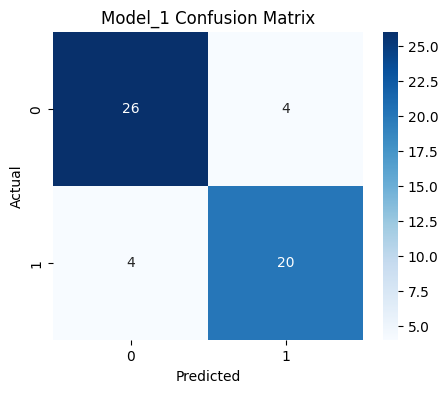


Evaluating Model_2...
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


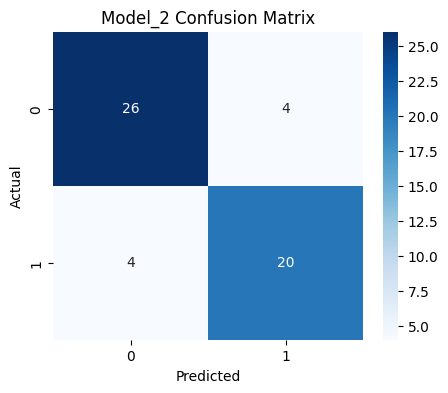


Evaluating Model_3...
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


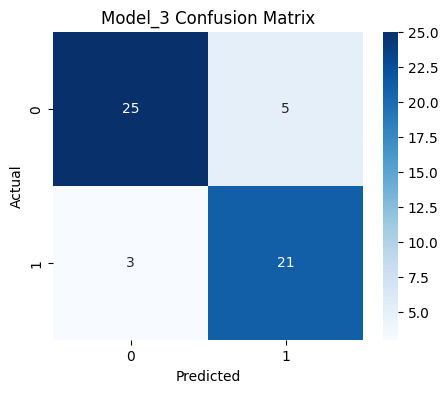

In [9]:
evaluation_results = {}

for name, model in models.items():
    print(f"\nEvaluating {name}...")

    y_pred = (model.predict(X_test) > 0.5).astype('int32')
    acc = accuracy_score(y_test, y_pred)

    evaluation_results[name] = {
        'accuracy': acc,
        'classification_report': classification_report(y_test, y_pred, output_dict=True),
        'confusion_matrix': confusion_matrix(y_test, y_pred).tolist()
    }

    # Confusion matrix
    plt.figure(figsize=(5,4))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
    plt.title(f'{name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Save evaluation results
with open('training_history.json', 'w') as f:
    json.dump(evaluation_results, f)


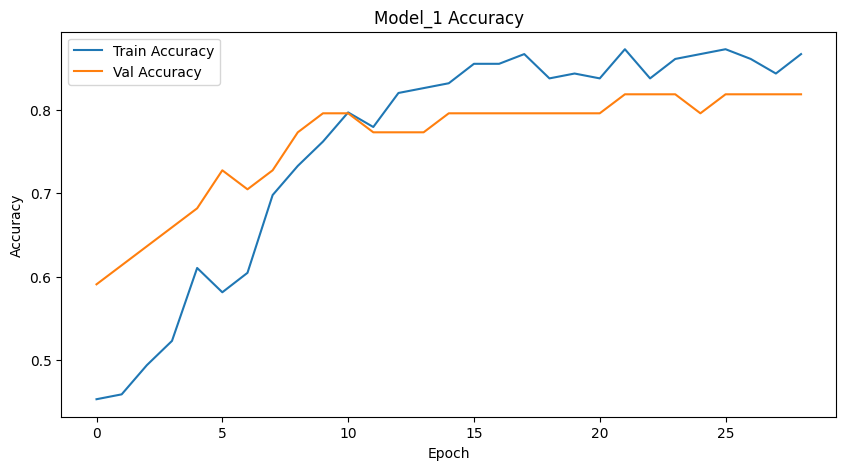

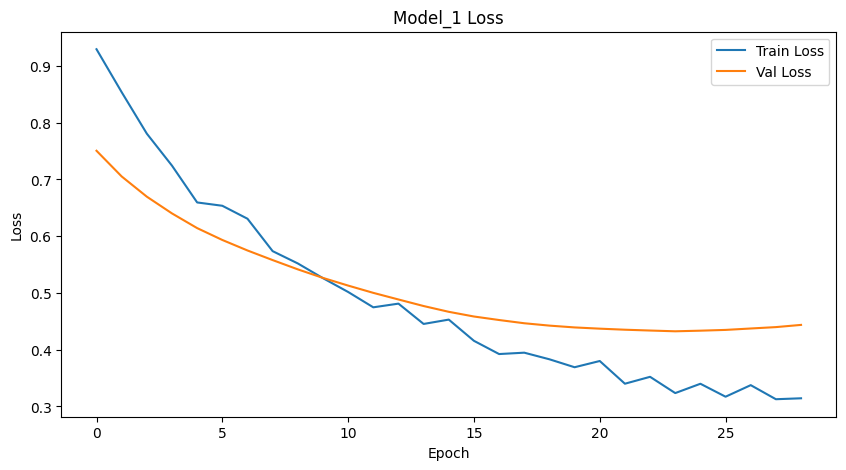

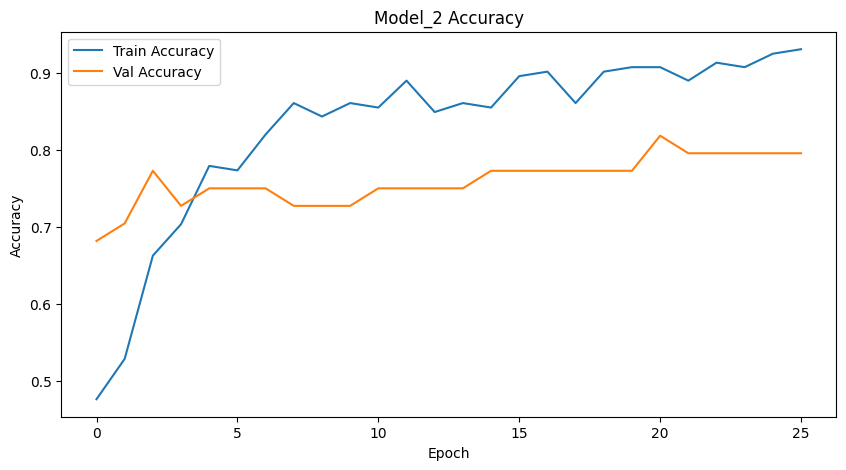

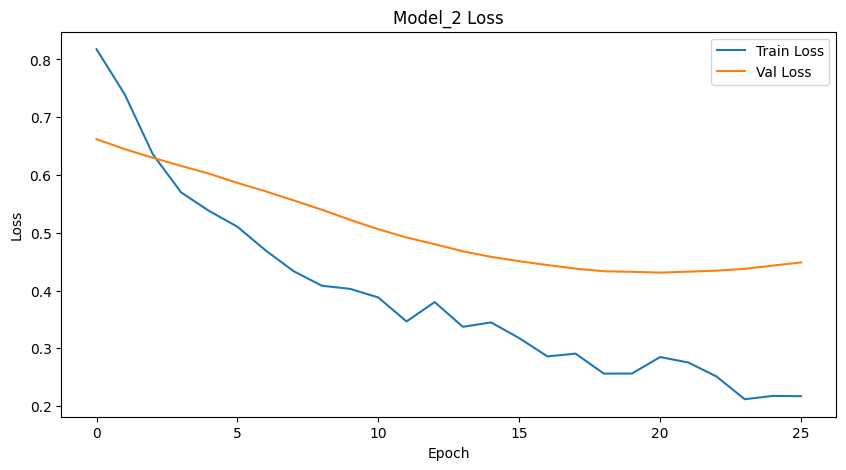

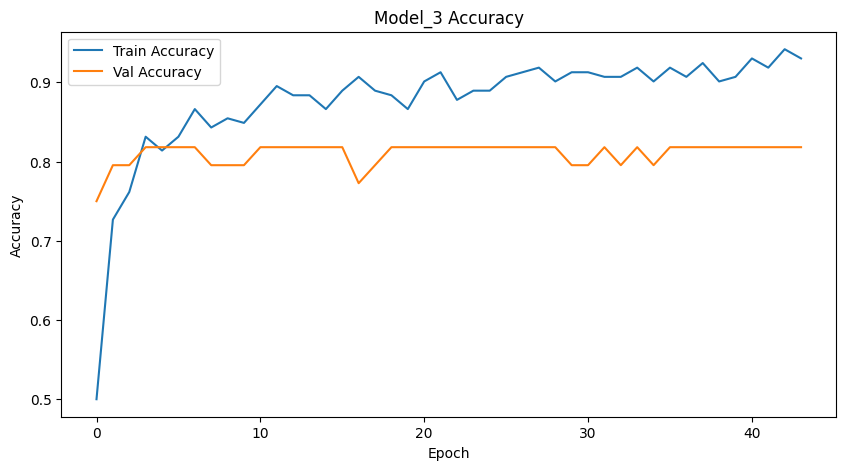

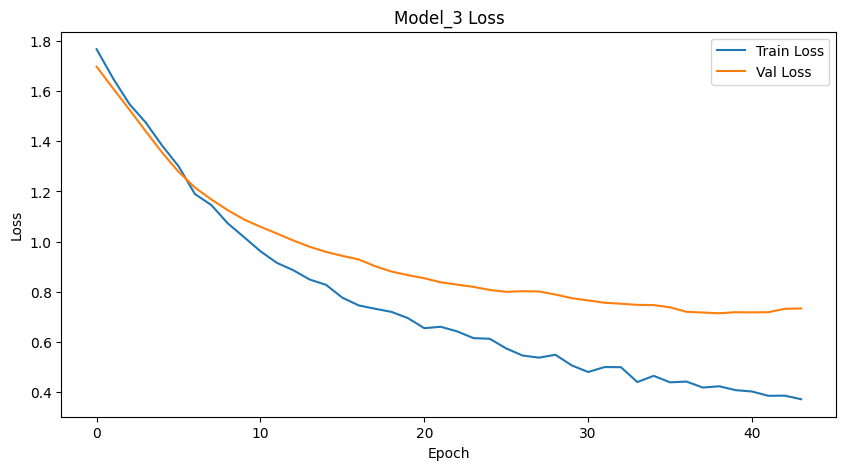

In [10]:
for name, history in histories.items():
    # Accuracy
    plt.figure(figsize=(10,5))
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Val Accuracy')
    plt.title(f'{name} Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

    # Loss
    plt.figure(figsize=(10,5))
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title(f'{name} Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()


In [15]:

#1️⃣ ضبط المعاملات باستخدام Keras Tuner

In [14]:
!pip install -q keras-tuner
import keras_tuner as kt

def build_model(hp):
    model = keras.Sequential()
    model.add(layers.Input(shape=(X_train.shape[1],)))

    # عدد الطبقات وعدد الوحدات في كل طبقة قابل للتغيير
    for i in range(hp.Int('num_layers', 2, 5)):
        model.add(layers.Dense(
            units=hp.Int(f'units_{i}', 16, 128, step=16),
            activation='relu'
        ))
        model.add(layers.Dropout(hp.Choice(f'dropout_{i}', [0.2, 0.3, 0.5])))

    model.add(layers.Dense(1, activation='sigmoid'))

    model.compile(
        optimizer=keras.optimizers.Adam(
            hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])
        ),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    return model

tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=10,
    executions_per_trial=1,
    directory='tuner_results',
    project_name='heart_disease_fcnn'
)

tuner.search(X_train, y_train, epochs=30, validation_split=0.2, verbose=1)
best_model = tuner.get_best_models(num_models=1)[0]
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]


Reloading Tuner from tuner_results/heart_disease_fcnn/tuner0.json


In [16]:
#2️⃣ استخدام k-fold cross-validation

In [17]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
fold = 1
cv_scores = []

for train_index, val_index in kf.split(X_train):
    X_tr, X_val = X_train[train_index], X_train[val_index]
    y_tr, y_val = y_train.iloc[train_index], y_train.iloc[val_index]

    model = keras.Sequential([
        layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
        layers.Dropout(0.3),
        layers.Dense(32, activation='relu'),
        layers.Dense(16, activation='relu'),
        layers.Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    model.fit(X_tr, y_tr, validation_data=(X_val, y_val), epochs=30, batch_size=32, verbose=0)

    acc = model.evaluate(X_val, y_val, verbose=0)[1]
    print(f'Fold {fold} Accuracy: {acc:.4f}')
    cv_scores.append(acc)
    fold += 1

print(f"\nAverage CV Accuracy: {np.mean(cv_scores):.4f}")


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Fold 1 Accuracy: 0.8182
Fold 2 Accuracy: 0.8372
Fold 3 Accuracy: 0.9070
Fold 4 Accuracy: 0.7442
Fold 5 Accuracy: 0.8605

Average CV Accuracy: 0.8334


In [18]:
#3️⃣ تطبيق Learning Rate Scheduler

In [19]:
def lr_scheduler(epoch, lr):
    if epoch % 10 == 0 and epoch:
        return lr * 0.5
    return lr

callback_lr = keras.callbacks.LearningRateScheduler(lr_scheduler)


In [20]:
#4️⃣ تجميع النماذج (Ensemble)

In [21]:
# Ensemble: متوسط التوقعات لثلاثة نماذج
preds1 = models['Model_1'].predict(X_test)
preds2 = models['Model_2'].predict(X_test)
preds3 = models['Model_3'].predict(X_test)

ensemble_preds = ((preds1 + preds2 + preds3)/3 > 0.5).astype(int)
print("Ensemble Accuracy:", accuracy_score(y_test, ensemble_preds))


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Ensemble Accuracy: 0.8333333333333334


In [22]:
#5️⃣ استخدام TensorBoard لتتبع التجارب

In [23]:
# إنشاء مجلد لتتبع التجارب
log_dir = "logs/fit/"
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

# أثناء التدريب أضف callback
model_1.fit(X_train, y_train, validation_split=0.2, epochs=50, batch_size=32, callbacks=[tensorboard_callback])


Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - accuracy: 0.8788 - loss: 0.2972 - val_accuracy: 0.7955 - val_loss: 0.4342
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.8223 - loss: 0.3475 - val_accuracy: 0.7955 - val_loss: 0.4355
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.8957 - loss: 0.3000 - val_accuracy: 0.8182 - val_loss: 0.4365
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.8711 - loss: 0.3163 - val_accuracy: 0.8182 - val_loss: 0.4375
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.8831 - loss: 0.3037 - val_accuracy: 0.8182 - val_loss: 0.4386
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.8702 - loss: 0.2944 - val_accuracy: 0.8182 - val_loss: 0.4404
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.8715 - loss: 0.3166 - val_accuracy: 0.8182 - val_loss: 0.4428
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.8662 - loss: 0.3342 - val_accuracy: 0.8182 - val_loss: 0.4456


In [24]:
#6️⃣ حفظ النتائج والتسليمات المطلوبة

In [25]:
# حفظ النماذج
model_1.save('model_1.h5')
model_2.save('model_2.h5')
model_3.save('model_3.h5')
best_model.save('best_model.h5')

# حفظ سجل التدريب والتقييم
with open('training_history.json', 'w') as f:
    json.dump(evaluation_results, f)
